In [1]:
import urllib.request
address = "https://crowd-power.appspot.com/_ah/api/mturk/v1/arrivalCompletions/list?from=01%2F01%2F2011&to=12%2F27%2F2016";
with urllib.request.urlopen(address) as url:
    response = url.read().decode('utf8')
#I'm guessing this would output the html source code?
#print(s)

In [2]:
import json
data = json.loads(response);
# print(data)

In [17]:
hitsNum = [];
price = [];
for dataDist in data['hourly']:
    hits = int(dataDist['hitsArrived']);
    rewards = float(dataDist['rewardsArrived']);
    if (hits > 0)&(rewards > 0):
        hitsNum.append(hits);
        price.append(rewards/hits)

In [21]:
import math
import numpy as np
from sys import float_info
diff = 1.0;
bins = np.arange(diff, math.ceil(max(price))+10*diff, diff)
counters = np.zeros(len(bins))
for i in range(len(price)):
    k = math.floor((price[i]-float_info.epsilon)/diff);
    counters[k] += hitsNum[i];
y = np.cumsum(counters);

<IPython.core.display.Javascript object>


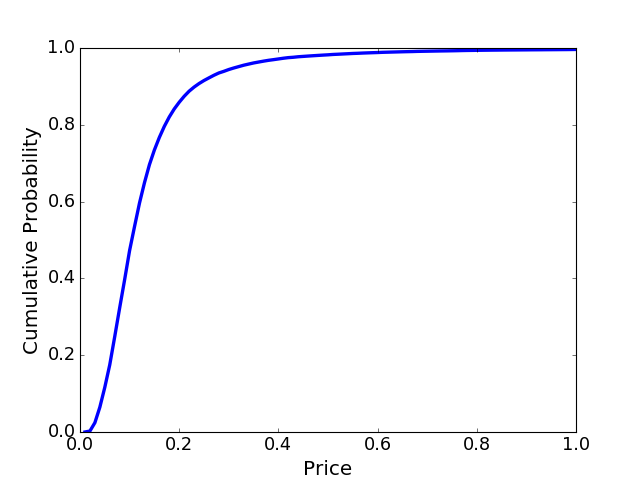

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(bins/100, y/y[-1],linewidth=3.0)
plt.xlim([0, 1])
plt.xlabel('Price',fontsize=18)
plt.ylabel('Cumulative Probability',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.savefig('MTurk5YearData.pdf', bbox_inches='tight')

In [30]:
import pickle
with open("MTurk5Year.data",'wb') as fp:
    pickle.dump([bins/100, y], fp)